#1.1 Exploratory Data Analysis(EDA)

In [78]:
!pip install scikeras
!pip install --upgrade scikit-learn
!pip install --upgrade keras

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from scikeras.wrappers import KerasRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [80]:
%matplotlib inline

In [81]:
data = pd.read_csv('airbnb.csv')

In [82]:
data.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

In [84]:
data.isnull().sum()

,0
Unnamed: 0,0
id,0
name,0
rating,0
reviews,0
host_name,8
host_id,0
address,0
features,0
amenities,0


In [85]:
data.describe()

,Unnamed: 0,id,host_id,price,bathrooms,beds,guests,toiles,bedrooms,studios
count,12805.000000,1.280500e+04,1.280500e+04,1.280500e+04,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000
mean,6402.000000,7.525187e+16,1.638192e+08,1.769780e+04,1.874424,3.316751,5.213745,0.019211,2.136041,0.023585
std,3696.629433,2.007933e+17,1.413622e+08,4.569364e+04,2.091399,4.037791,3.808830,0.137272,2.359005,0.151757
min,0.000000,1.313100e+04,2.303900e+04,3.930000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3201.000000,2.023958e+07,3.700032e+07,3.994000e+03,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000
50%,6402.000000,3.682229e+07,1.256459e+08,8.175000e+03,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000
75%,9603.000000,4.999760e+07,2.639623e+08,1.606200e+04,2.000000,4.000000,6.000000,0.000000,3.000000,0.000000
max,12804.000000,7.017905e+17,4.758973e+08,1.907963e+06,50.000000,98.000000,16.000000,1.000000,50.000000,1.000000


In [86]:
numerical_columns = ['rating', 'reviews']

print(data[numerical_columns].describe())

       rating reviews
count   12805   12805
unique     77     409
top       New       0
freq     4238    2393


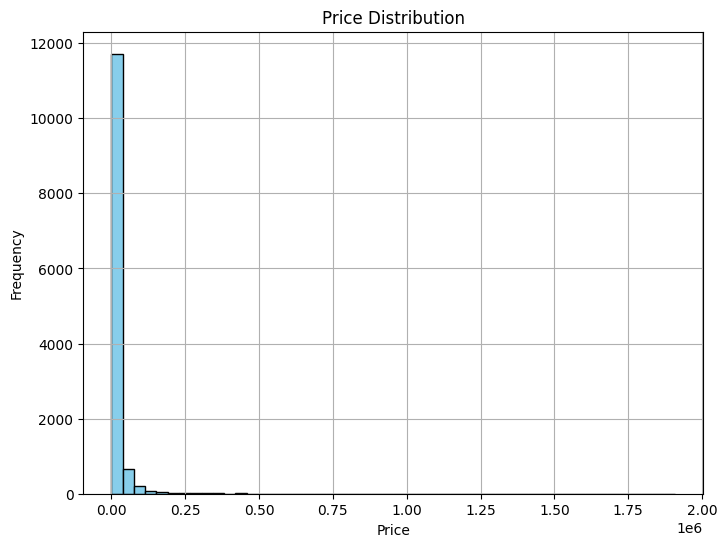

In [87]:
plt.figure(figsize=(8, 6))
plt.hist(data['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

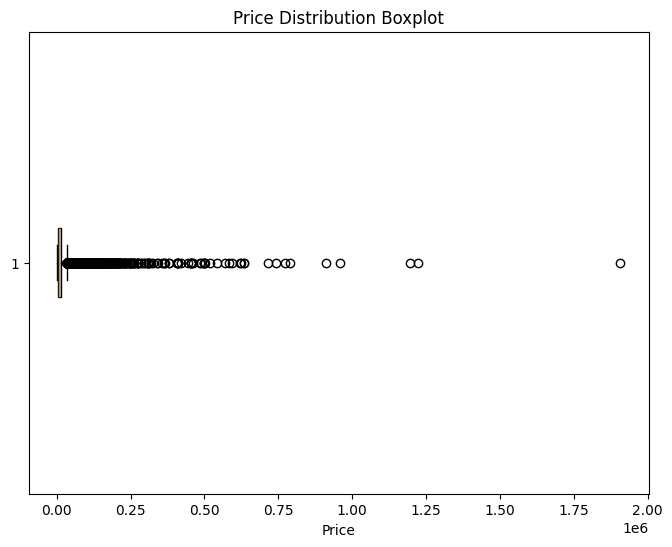

In [88]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Price Distribution Boxplot')
plt.xlabel('Price')
plt.show()

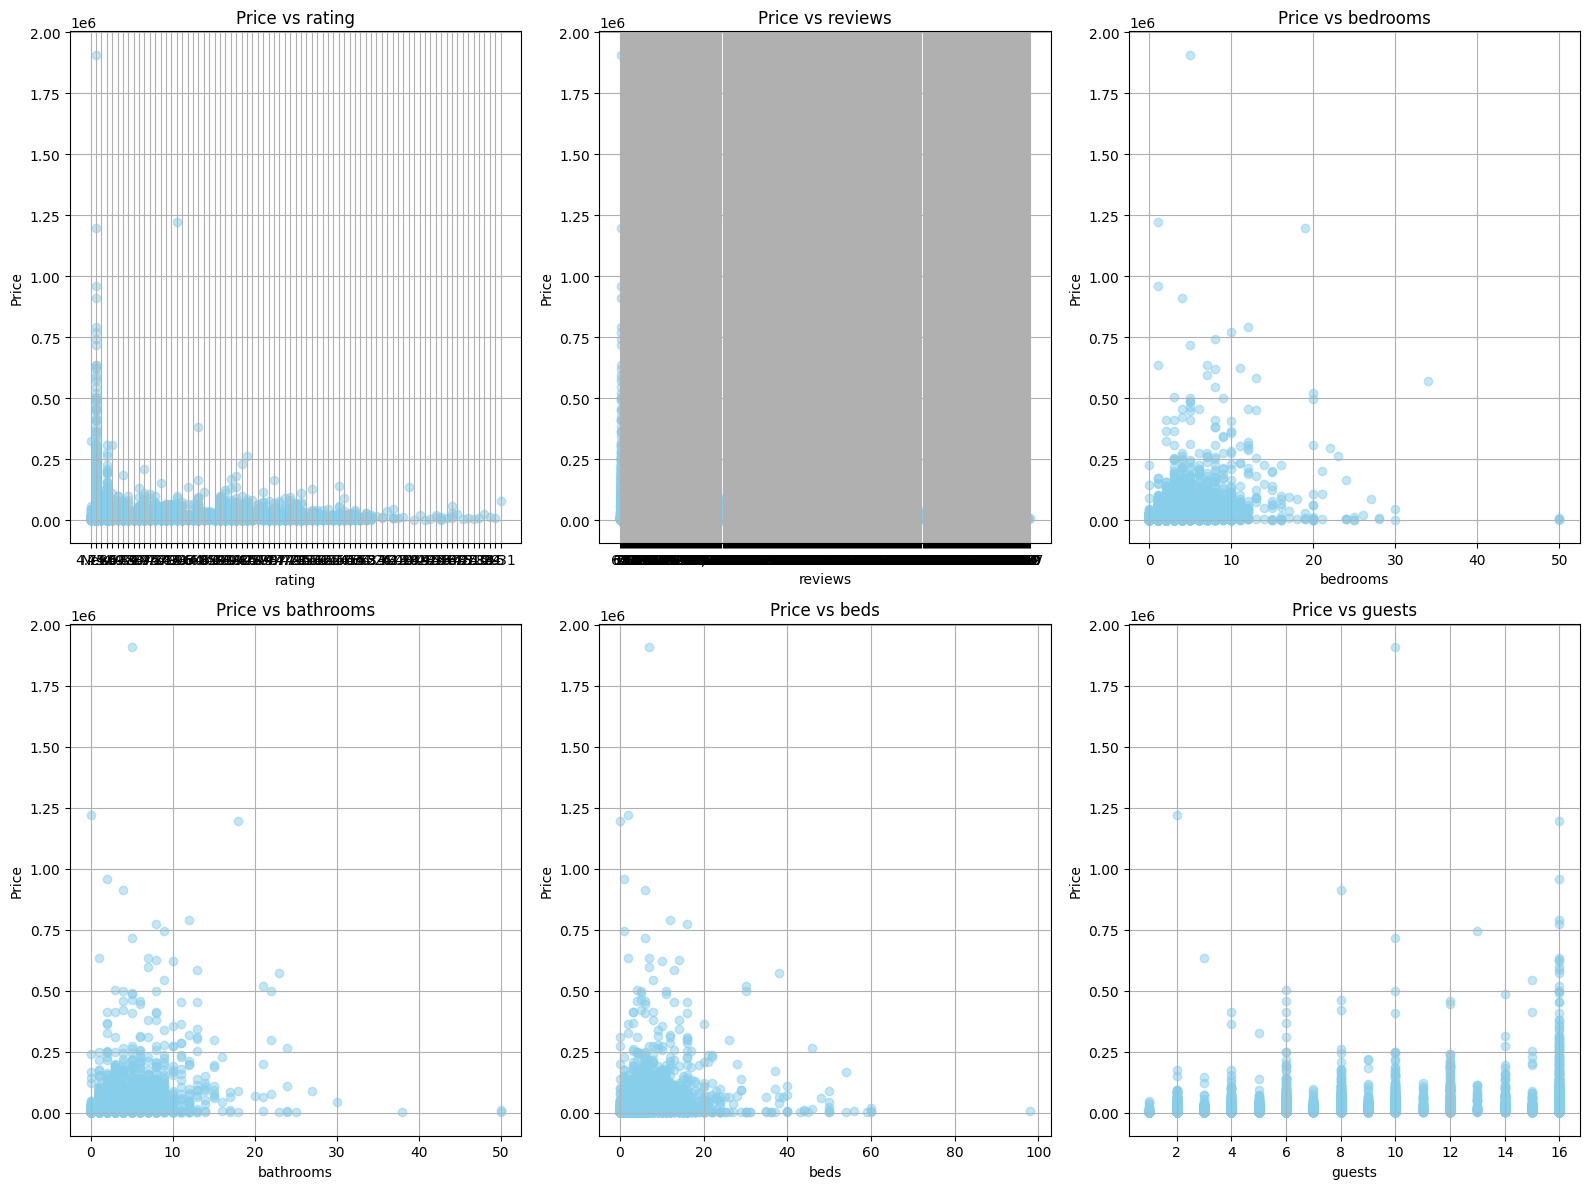

In [89]:
numerical_columns = ['rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests']

plt.figure(figsize=(16, 12))

for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(data[column], data['price'], alpha=0.5, color='skyblue')
    plt.title(f'Price vs {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.grid(True)

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'beds'}>],
       [<Axes: title={'center': 'guests'}>,
        <Axes: title={'center': 'toiles'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'studios'}>, <Axes: >, <Axes: >]],
      dtype=object)

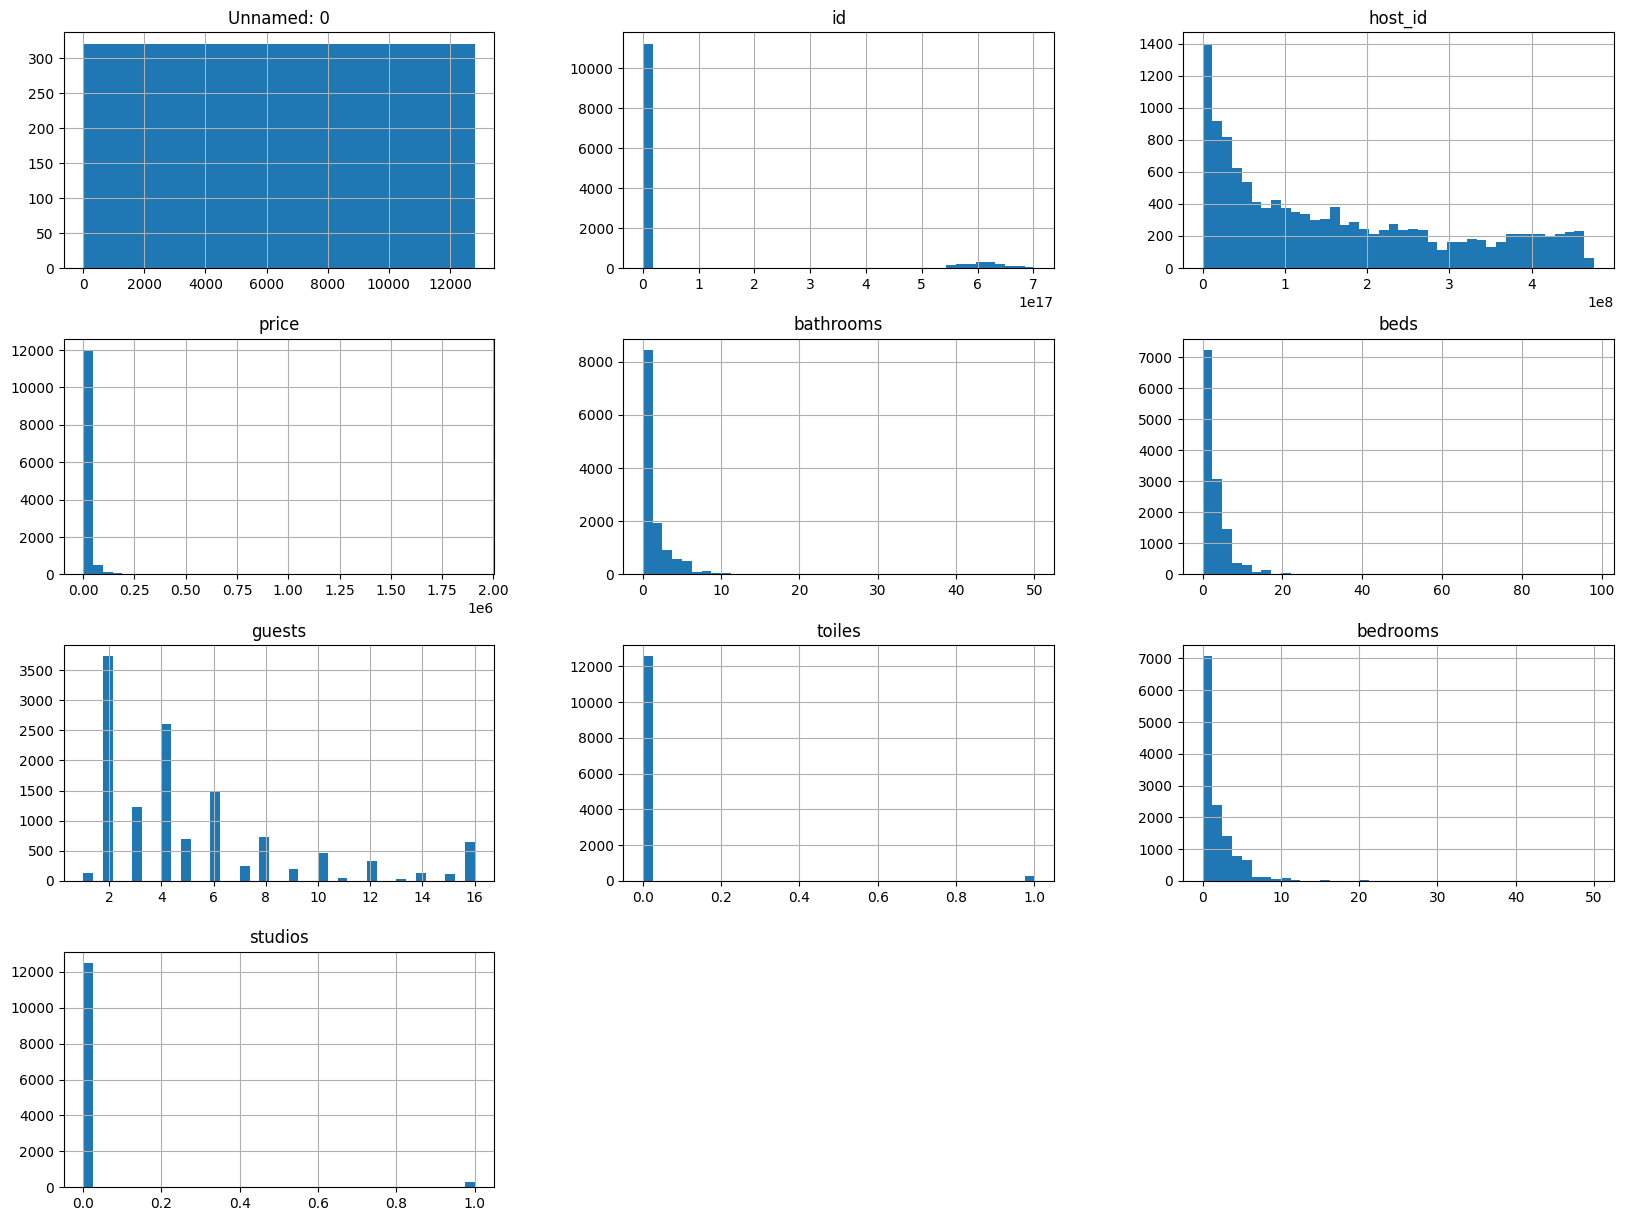

In [90]:
data.hist(bins=40, figsize=(20,15))

In [91]:
data['host_name'].fillna(data['host_name'].mode()[0], inplace=True)

In [92]:
data['rating'] = data['rating'].replace('New', float('NaN'))

In [93]:
data['rating'].fillna(data['rating'].mode()[0], inplace=True)

In [94]:
for col in ['rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests']:
    if data[col].dtype == 'object':
        data[col] = data[col].astype(str).str.replace(',', '', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [95]:
corr_data = data[['rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests','price']].corr()

In [96]:
corr_data['price'].sort_values(ascending=False)

,price
price,1.000000
bathrooms,0.364693
bedrooms,0.339388
guests,0.323393
beds,0.233677
rating,0.095473
reviews,-0.067128


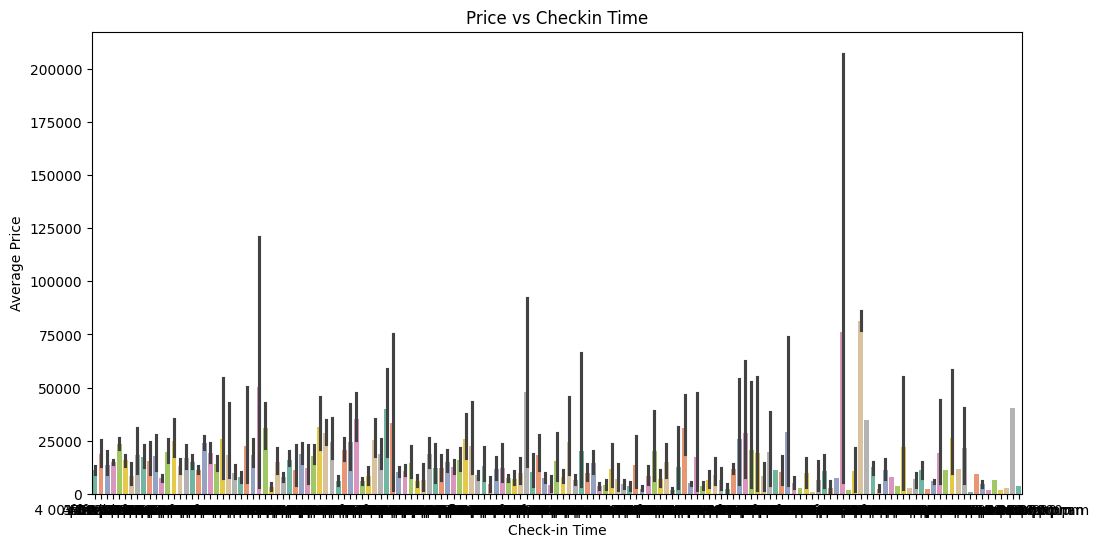

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='checkin', y='price', palette='Set2')
plt.title('Price vs Checkin Time')
plt.xlabel('Check-in Time')
plt.ylabel('Average Price')
plt.show()

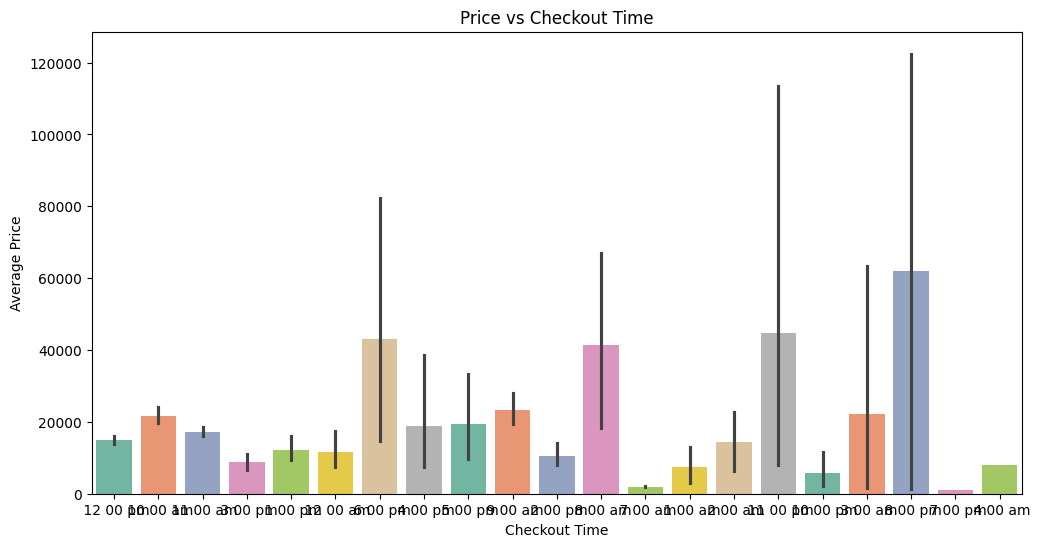

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='checkout', y='price', palette='Set2')
plt.title('Price vs Checkout Time')
plt.xlabel('Checkout Time')
plt.ylabel('Average Price')
plt.show()

In [99]:
categorical_columns = ['country', 'host_name', 'amenities', 'features']

for column in categorical_columns:
    print(f"\n{column} - Unique Values and Counts:")
    print(data[column].value_counts())


country - Unique Values and Counts:
country
 India         2766
 Italy         1186
 Greece         885
 Thailand       677
 Turkey         519
               ... 
 Kosovo           1
 Guatemala        1
 St Martin        1
Puerto Rico       1
 Senegal          1
Name: count, Length: 148, dtype: int64

host_name - Unique Values and Counts:
host_name
Onda         66
Maria        51
David        39
George       39
Amit         33
             ..
Sukanya       1
동현            1
Froi          1
Jaime         1
VillaTuba     1
Name: count, Length: 6837, dtype: int64

amenities - Unique Values and Counts:
amenities
Long-term stays allowed,Unavailable: Carbon monoxide alarmCarbon monoxide alarm,Unavailable: Smoke alarmSmoke alarm                                                                                                                        27
Kitchen,Wifi,Free parking on premises,Pool,TV,Washing machine,Air conditioning,Patio or balcony,Unavailable: Carbon monoxide alarmCarbon monoxid

In [100]:
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147],
 [Text(0, 0, ' Turkey'),
  Text(1, 0, ' Georgia'),
  Text(2, 0, ' Vietnam

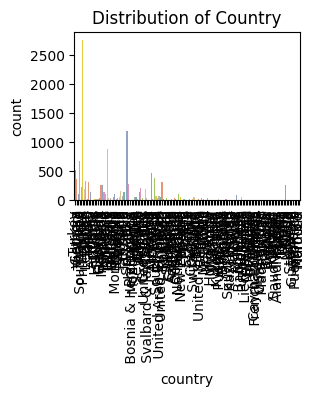

In [101]:
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='country', palette='Set2')
plt.title('Distribution of Country')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

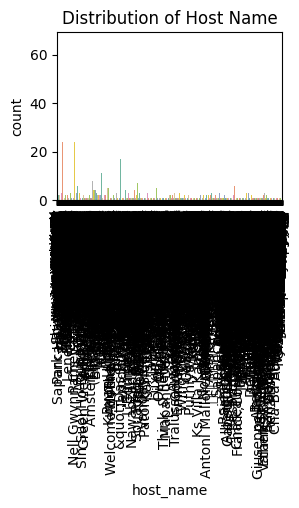

In [102]:
plt.subplot(2, 2, 2)
sns.countplot(data=data, x='host_name', palette='Set2')
plt.title('Distribution of Host Name')
plt.xticks(rotation=90)

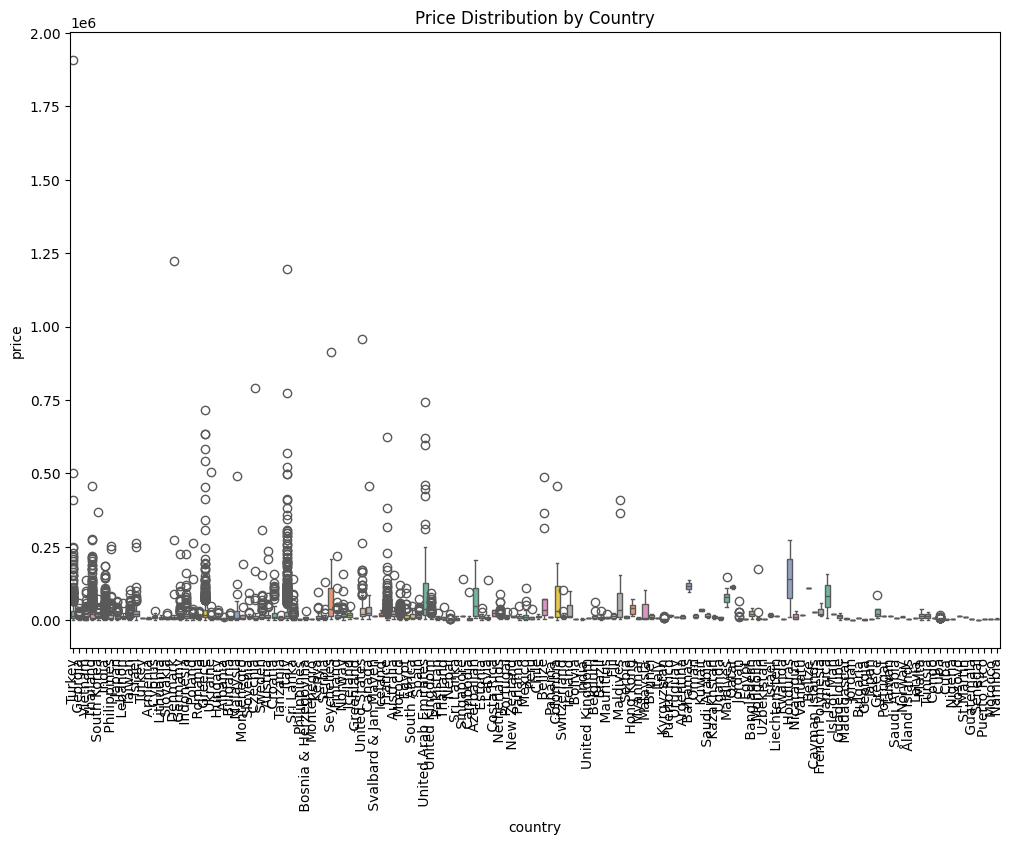

In [103]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='country', y='price', palette='Set2')
plt.title('Price Distribution by Country')
plt.xticks(rotation=90)
plt.show()

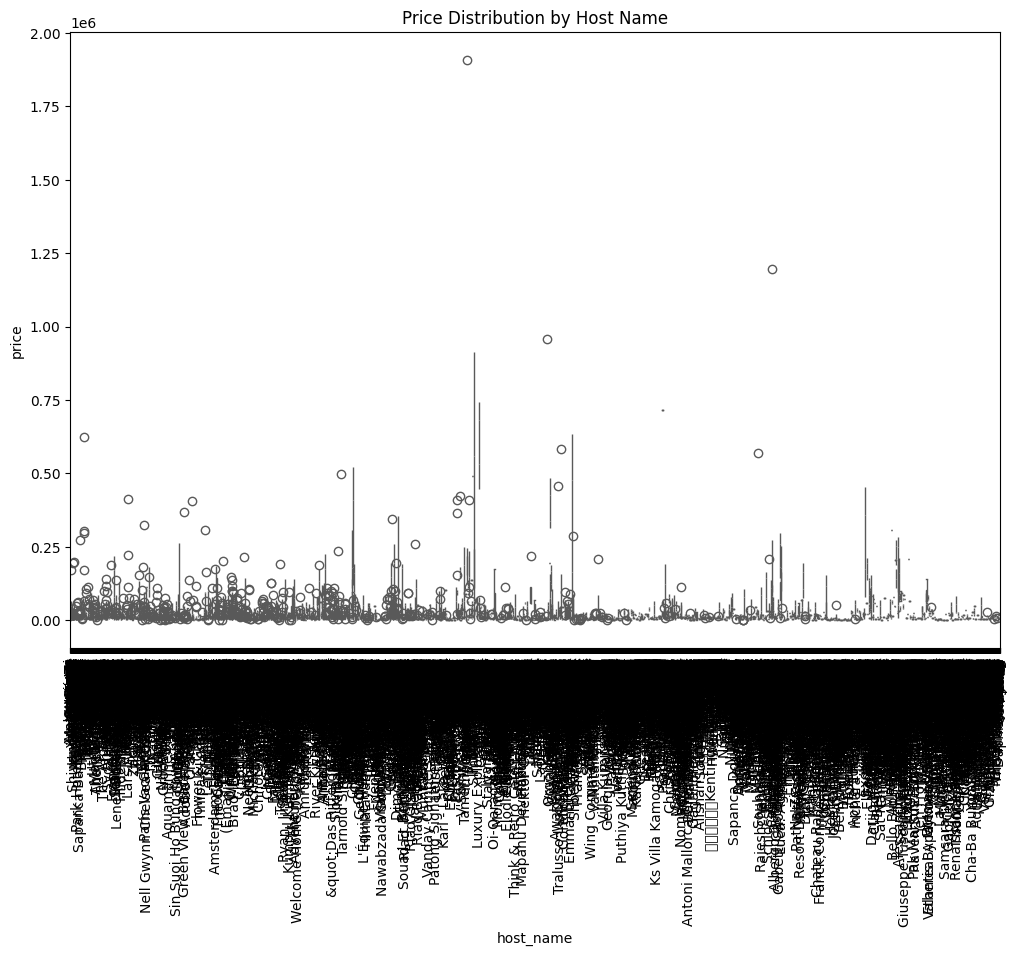

In [104]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='host_name', y='price', palette='Set2')
plt.title('Price Distribution by Host Name')
plt.xticks(rotation=90)
plt.show()

In [105]:
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=data, x='amenities', y='price', palette='Set2')
# plt.title('Price Distribution by Amenities')
# plt.xticks(rotation=90)
# plt.show()

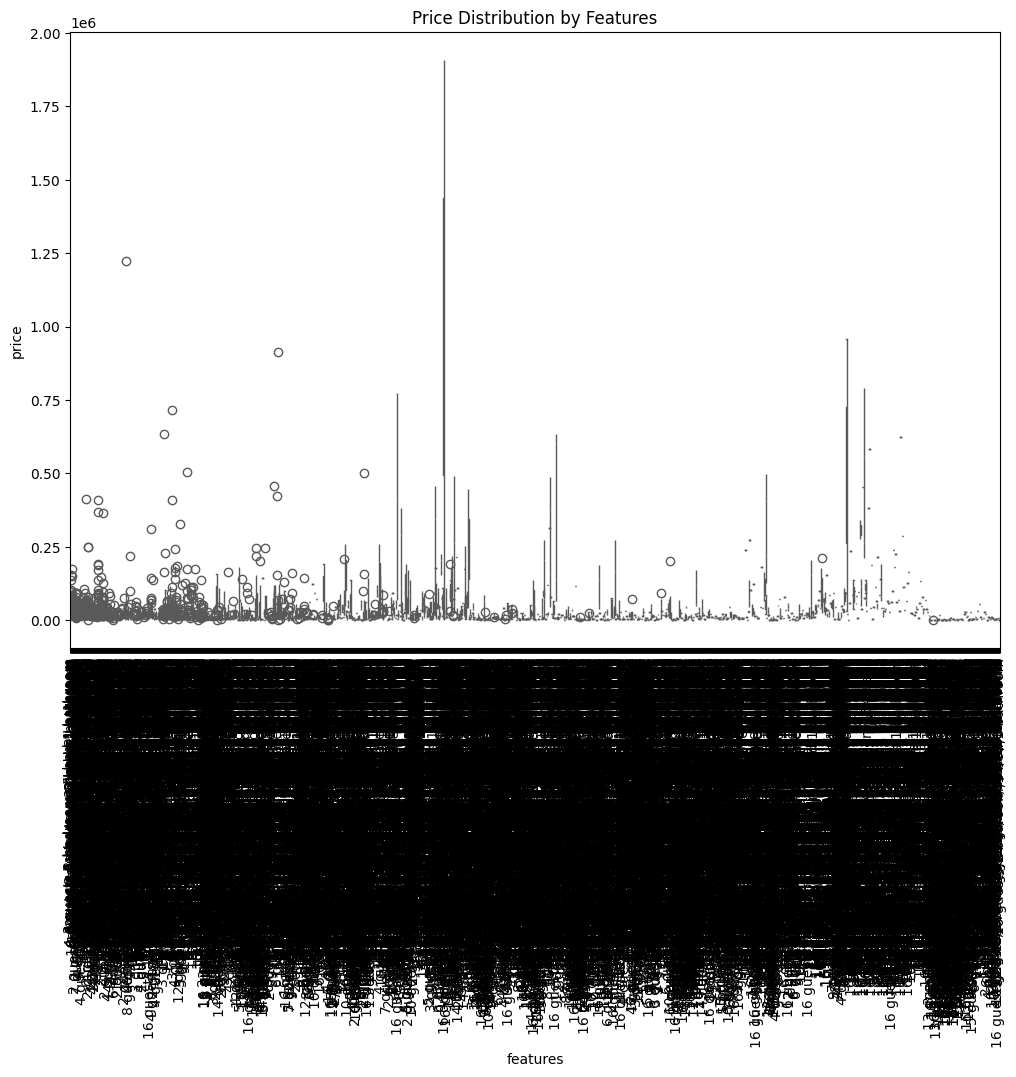

In [106]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='features', y='price', palette='Set2')
plt.title('Price Distribution by Features')
plt.xticks(rotation=90)
plt.show()

In [107]:
print(data.groupby('country')['price'].describe())

                count          mean           std      min       25%      50%  \
country                                                                         
 Albania          4.0   4749.750000   3630.162933   1812.0   2844.75   3579.5   
 Argentina        3.0  10647.000000   6603.610830   6353.0   6845.00   7337.0   
 Armenia          6.0   6591.166667   3071.818381   3290.0   4062.00   6258.0   
 Australia       25.0  26735.000000  28687.037852   4563.0  13290.00  20233.0   
 Austria         63.0  20849.555556  39293.929181   1736.0   5466.00   9557.0   
...               ...           ...           ...      ...       ...      ...   
Sri Lanka         4.0   5507.750000   5672.533436   1519.0   1747.75   3415.5   
Taiwan            1.0  15541.000000           NaN  15541.0  15541.00  15541.0   
Thailand          6.0  11293.833333  17019.904693   1639.0   2092.75   4285.5   
Turkey            3.0   7791.333333    897.668833   6774.0   7451.00   8128.0   
United Kingdom    1.0   8313

In [108]:
print(data.groupby('amenities')['price'].describe())

                                                    count     mean  std  \
amenities                                                                 
Air conditioning,Breakfast,Long-term stays allo...    1.0  18259.0  NaN   
Air conditioning,Breakfast,Smoking allowed,Long...    1.0   9588.0  NaN   
Air conditioning,Breakfast,Smoking allowed,Long...    1.0  20006.0  NaN   
Air conditioning,Breakfast,Smoking allowed,Unav...    1.0  13488.0  NaN   
Air conditioning,Gym,Long-term stays allowed,Un...    1.0   5066.0  NaN   
...                                                   ...      ...  ...   
Wifi,Washing machine,Dryer,Patio or balcony,Cot...    1.0   7072.0  NaN   
Wifi,Washing machine,Dryer,Shared patio or balc...    1.0   1418.0  NaN   
Wifi,Washing machine,Patio or balcony,Garden,Lu...    1.0   1090.0  NaN   
Wifi,Washing machine,Refrigerator,Long-term sta...    1.0    913.0  NaN   
Wifi,Washing machine,Smoking allowed,Long-term ...    1.0  32482.0  NaN   

                        

#1.2 Data Cleaning

In [109]:
data.isnull().sum()

,0
Unnamed: 0,0
id,0
name,0
rating,0
reviews,0
host_name,0
host_id,0
address,0
features,0
amenities,0


In [110]:
data['checkin'].fillna('Flexible', inplace=True)
data['checkout'].fillna('Flexible', inplace=True)

In [111]:
data.isnull().sum()

,0
Unnamed: 0,0
id,0
name,0
rating,0
reviews,0
host_name,0
host_id,0
address,0
features,0
amenities,0


In [112]:
data.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,5.00,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,5.00,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


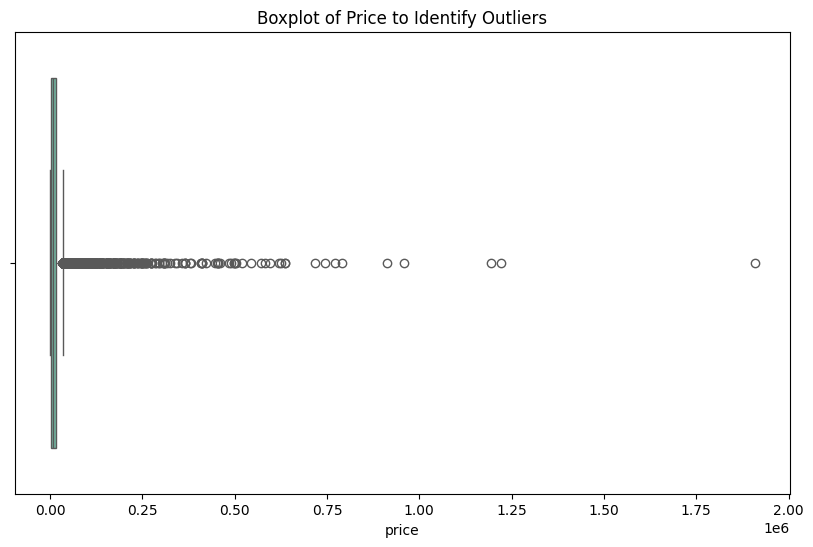

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='price', palette='Set2')
plt.title('Boxplot of Price to Identify Outliers')
plt.show()

In [114]:
percentile_95 = data['price'].quantile(0.95)
data_no_outliers = data[data['price'] <= percentile_95]

print(f"Data shape after removing outliers: {data_no_outliers.shape}")

Data shape after removing outliers: (12166, 23)


In [115]:
data['price'] = data['price'].clip(upper=percentile_95)
print(data['price'].describe())

count    12805.000000
mean     13465.165951
std      14704.409536
min        393.000000
25%       3994.000000
50%       8175.000000
75%      16062.000000
max      59056.000000
Name: price, dtype: float64


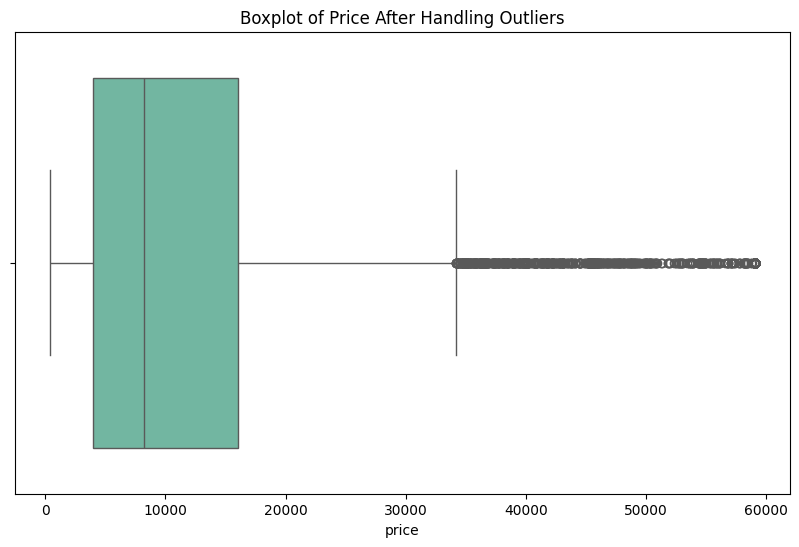

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='price', palette='Set2')
plt.title('Boxplot of Price After Handling Outliers')
plt.show()

In [117]:
data.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,5.00,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,5.00,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [118]:
data_dropped_categorical = data.drop(columns=['Unnamed: 0','id', 'name', 'host_name', 'address', 'safety_rules', 'hourse_rules', 'img_links'])

In [119]:
data_dropped_categorical

,rating,reviews,host_id,features,amenities,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,4.71,64,357334205.0,"2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,5.00,0,386223873.0,"4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,4.85,68,409690853.0,"4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,5.00,13,401873242.0,"4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,5.00,0,414884116.0,"2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,4.94,16,161552316.0,"4 guests,8 bathrooms","Kitchen,Wifi,Free parking on premises,Private ...",4288,South Korea,8,0,4,0,0,0,3 00 pm - 11 00 pm,11 00 am
12801,4.67,6,118954227.0,"2 guests,1 bedroom,1 bed,Toilet with sink","Wifi,Free on-street parking,Air conditioning,G...",15200,Indonesia,0,1,2,1,1,0,3 00 pm - 10 00 pm,12 00 pm
12802,4.67,3,175214568.0,"2 guests,1 bedroom,2 beds,1 private bathroom","Wifi,Breakfast,Long-term stays allowed,Unavail...",9103,Uganda,1,2,2,0,1,0,After 3 00 pm,Flexible
12803,4.86,7,718423.0,"8 guests,2 bedrooms,4 beds,2.5 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",42262,Indonesia,2,4,8,0,2,0,Flexible,12 00 pm


In [120]:
data.drop(columns=['Unnamed: 0','id', 'name', 'host_name','host_id', 'address', 'safety_rules', 'hourse_rules', 'img_links'], inplace=True)

In [121]:
data.head()

,rating,reviews,features,amenities,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,4.71,64,"2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,5.00,0,"4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,4.85,68,"4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,5.00,13,"4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,5.00,0,"2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [122]:
data['amenities_list'] = data['amenities'].apply(lambda x: [i.strip() for i in x.split(',')])
mlb = MultiLabelBinarizer()
amenities_encoded = pd.DataFrame(mlb.fit_transform(data['amenities_list']), columns=mlb.classes_)

data = pd.concat([data, amenities_encoded], axis=1)
data.drop(['amenities', 'amenities_list'], axis=1, inplace=True)

In [123]:
data.head()

,rating,reviews,features,price,country,bathrooms,beds,guests,toiles,bedrooms,...,open specific hours,rooftop,saltwater,standard cable/satellite,sun loungers,wood-burning,ハイアール 小型冷蔵冷凍庫 refrigerator,노래방기계 Bluetooth sound system,딤채 Dimchae refrigerator,쿠잉 115L 레트로 refrigerator
0,4.71,64,"2 guests,2 bedrooms,1 bed,1 bathroom",8078,Turkey,1,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0
1,5.00,0,"4 guests,2 bedrooms,2 beds,2 bathrooms",4665,Turkey,2,2,4,0,2,...,0,0,0,0,0,0,0,0,0,0
2,4.85,68,"4 guests,1 bedroom,3 beds,1 bathroom",5991,Georgia,1,3,4,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5.00,13,"4 guests,1 bedroom,2 beds,1 bathroom",11339,Turkey,1,2,4,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5.00,0,"2 guests,1 bedroom,1 bed,1 bathroom",6673,Turkey,1,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [124]:
def time_bucket(time_str):
    if 'flexible' in time_str.lower():
        return 'flexible'
    elif 'am' in time_str.lower():
        return 'morning'
    elif 'pm' in time_str.lower():
        return 'afternoon'
    else:
        return 'unknown'

data['checkin_bucket'] = data['checkin'].apply(time_bucket)
data['checkout_bucket'] = data['checkout'].apply(time_bucket)

In [125]:
data= pd.get_dummies(data, columns=['checkin_bucket', 'checkout_bucket'], drop_first=True)
data.drop(['checkin', 'checkout'], axis=1, inplace=True)

In [126]:
data.head()

,rating,reviews,features,price,country,bathrooms,beds,guests,toiles,bedrooms,...,sun loungers,wood-burning,ハイアール 小型冷蔵冷凍庫 refrigerator,노래방기계 Bluetooth sound system,딤채 Dimchae refrigerator,쿠잉 115L 레트로 refrigerator,checkin_bucket_flexible,checkin_bucket_morning,checkout_bucket_flexible,checkout_bucket_morning
0,4.71,64,"2 guests,2 bedrooms,1 bed,1 bathroom",8078,Turkey,1,1,2,0,2,...,0,0,0,0,0,0,True,False,False,False
1,5.00,0,"4 guests,2 bedrooms,2 beds,2 bathrooms",4665,Turkey,2,2,4,0,2,...,0,0,0,0,0,0,False,False,False,True
2,4.85,68,"4 guests,1 bedroom,3 beds,1 bathroom",5991,Georgia,1,3,4,0,1,...,0,0,0,0,0,0,False,False,False,False
3,5.00,13,"4 guests,1 bedroom,2 beds,1 bathroom",11339,Turkey,1,2,4,0,1,...,0,0,0,0,0,0,False,False,False,False
4,5.00,0,"2 guests,1 bedroom,1 bed,1 bathroom",6673,Turkey,1,1,2,0,1,...,0,0,0,0,0,0,False,False,False,False


In [127]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[['country']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['country']))

In [128]:
data = pd.concat([data.drop('country', axis=1), encoded_df], axis=1)

In [129]:
data.head()

,rating,reviews,features,price,bathrooms,beds,guests,toiles,bedrooms,studios,...,country_Philippines,country_Portugal,country_Puerto Rico,country_Saudi Arabia,country_Serbia,country_Sri Lanka,country_Taiwan,country_Thailand,country_Turkey,country_United Kingdom
0,4.71,64,"2 guests,2 bedrooms,1 bed,1 bathroom",8078,1,1,2,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.00,0,"4 guests,2 bedrooms,2 beds,2 bathrooms",4665,2,2,4,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.85,68,"4 guests,1 bedroom,3 beds,1 bathroom",5991,1,3,4,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.00,13,"4 guests,1 bedroom,2 beds,1 bathroom",11339,1,2,4,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.00,0,"2 guests,1 bedroom,1 bed,1 bathroom",6673,1,1,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
data.drop('features',axis=1,inplace=True)

In [131]:
data

,rating,reviews,price,bathrooms,beds,guests,toiles,bedrooms,studios,"100"" HDTV with Amazon Prime Video",...,country_Philippines,country_Portugal,country_Puerto Rico,country_Saudi Arabia,country_Serbia,country_Sri Lanka,country_Taiwan,country_Thailand,country_Turkey,country_United Kingdom
0,4.71,64,8078,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.00,0,4665,2,2,4,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.85,68,5991,1,3,4,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.00,13,11339,1,2,4,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.00,0,6673,1,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,4.94,16,4288,8,0,4,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12801,4.67,6,15200,0,1,2,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12802,4.67,3,9103,1,2,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12803,4.86,7,42262,2,4,8,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
data.columns

Index(['rating', 'reviews', 'price', 'bathrooms', 'beds', 'guests', 'toiles',
       'bedrooms', 'studios', '100" HDTV with Amazon Prime Video',
       ...
       'country_Philippines', 'country_Portugal', 'country_Puerto Rico',
       'country_Saudi Arabia', 'country_Serbia', 'country_Sri Lanka',
       'country_Taiwan', 'country_Thailand', 'country_Turkey',
       'country_United Kingdom'],
      dtype='object', length=958)

In [133]:
scaler = StandardScaler()

data[['rating', 'reviews', 'price']] = scaler.fit_transform(data[['rating', 'reviews', 'price']])

In [134]:
data.head()

,rating,reviews,price,bathrooms,beds,guests,toiles,bedrooms,studios,"100"" HDTV with Amazon Prime Video",...,country_Philippines,country_Portugal,country_Puerto Rico,country_Saudi Arabia,country_Serbia,country_Sri Lanka,country_Taiwan,country_Thailand,country_Turkey,country_United Kingdom
0,-1.460563,0.421640,-0.366378,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.715508,-0.546953,-0.598495,2,2,4,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.410046,0.482177,-0.508314,1,3,4,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.715508,-0.350207,-0.144599,1,2,4,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.715508,-0.546953,-0.461932,1,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#1.3 Model Creation

In [136]:
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [158]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │       245,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 865,541 (3.30 MB)

 Trainable params: 288,513 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 577,028 (2.20 MB)

In [137]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

In [138]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test) ,epochs=100, batch_size=32,callbacks=[early_stopping])

Epoch 1/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.6883 - mae: 0.5646 - val_loss: 0.4928 - val_mae: 0.4741
Epoch 2/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.4751 - mae: 0.4533 - val_loss: 0.4473 - val_mae: 0.4171
Epoch 3/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4012 - mae: 0.4108 - val_loss: 0.4262 - val_mae: 0.4102
Epoch 4/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3837 - mae: 0.4026 - val_loss: 0.4029 - val_mae: 0.4181
Epoch 5/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3397 - mae: 0.3762 - val_loss: 0.4080 - val_mae: 0.4129
Epoch 6/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3175 - mae: 0.3619 - val_loss: 0.4014 - val_mae: 0.4274
Epoch 7/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2985 - mae: 0.3560 - val_loss: 0.4193 - val_mae: 0.4073
Epoch 8/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2774 - mae: 0.3438 - val_loss: 0.4001 - val_mae: 0.4172
Epoch 9/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 7m

In [139]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE: 0.396
R² Score: 0.588


#1.4 Accuracy Improvement

In [140]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

In [141]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MAE: 0.3979675980466823
MSE: 0.39630016267856266
RMSE: 0.6295237586291423
R² Score: 0.5878831279343799


In [142]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'batch_size': [32, 64, 128]
}

mlp = MLPRegressor(max_iter=1000, random_state=42)

In [143]:
# grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
# grid_search.fit(X_train, y_train)

In [144]:
data.head(10)

,rating,reviews,price,bathrooms,beds,guests,toiles,bedrooms,studios,"100"" HDTV with Amazon Prime Video",...,country_Philippines,country_Portugal,country_Puerto Rico,country_Saudi Arabia,country_Serbia,country_Sri Lanka,country_Taiwan,country_Thailand,country_Turkey,country_United Kingdom
0,-1.460563,0.421640,-0.366378,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.715508,-0.546953,-0.598495,2,2,4,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.410046,0.482177,-0.508314,1,3,4,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.715508,-0.350207,-0.144599,1,2,4,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.715508,-0.546953,-0.461932,1,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.715508,-0.546953,0.085953,1,2,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.715508,-0.546953,-0.078426,1,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.715508,-0.546953,0.012911,1,2,8,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.715508,-0.546953,-0.796946,1,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-1.760711,-0.501550,1.157578,3,6,10,0,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
data['bed_bath_interaction'] = data['bedrooms'] * data['bathrooms']

In [146]:
data.head()

,rating,reviews,price,bathrooms,beds,guests,toiles,bedrooms,studios,"100"" HDTV with Amazon Prime Video",...,country_Portugal,country_Puerto Rico,country_Saudi Arabia,country_Serbia,country_Sri Lanka,country_Taiwan,country_Thailand,country_Turkey,country_United Kingdom,bed_bath_interaction
0,-1.460563,0.421640,-0.366378,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.715508,-0.546953,-0.598495,2,2,4,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,-0.410046,0.482177,-0.508314,1,3,4,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.715508,-0.350207,-0.144599,1,2,4,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.715508,-0.546953,-0.461932,1,1,2,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [149]:
cv_scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [150]:
cv_scores

array([-0.60221262, -0.60968594, -0.57016528, -0.57416016, -0.58054661])

In [152]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [153]:
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

In [154]:
final_pred = (rf_pred + gb_pred) / 2

ensemble_mae = mean_absolute_error(y_test, final_pred)
print(f'Ensemble MAE: {ensemble_mae}')

Ensemble MAE: 0.41338359123451146


In [157]:
stacked_features = np.column_stack((rf_pred, gb_pred))

meta_model = LinearRegression()
meta_model.fit(stacked_features, y_test)

final_pred = meta_model.predict(stacked_features)

ensemble_mae = mean_absolute_error(y_test, final_pred)
print(f'Ensemble MAE: {ensemble_mae}')

Ensemble MAE: 0.4090447993526687
